We have the cost function 
$$Cost(w,b) = \frac{1}{2N} \sum_{i=0}^{N-1} (wx_i+b-y_i)^2
$$
Hence the gradients $dw = \frac{\partial C}{\partial w}$ and $db = \frac{\partial C}{\partial b}$ are given by
$$
dw = \frac{1}{N} \sum (wx_i + b -y_i) x_i  \\ 
db = \frac{1}{N} \sum (wx_i + b -y_i)  
$$


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def initialize():
    np.random.seed(2020)
    w=np.random.rand(1)
    b=0
    return w,b

w,b=initialize()    
print(w,b)

[0.98627683] 0


In [42]:
def cost0(w,b):
    """
    define the cost function MSE (mean square error, mean(h-y)**2)) 
    input : w, b
    output : MSE cost 
    """
    N=y.shape[0]
    c=np.sum((w*x+b-y)**2)/(2*N)
    return c

# going to view cost as a function of w and b, so we need to vectorize cost0
cost = np.vectorize(cost0)

In [43]:
N = 100

np.random.seed(2020)
x = np.random.rand(N, 1)
eps=0.5
y= 2 + 3 * x  + np.random.rand(N, 1)*eps

w =  [2.57458247] b =  [2.47732406]
final cost =  [0.02167546]


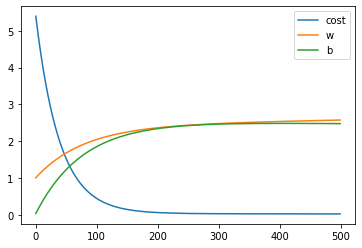

In [44]:
%matplotlib inline

########## MAIN FITTING ALGORITHM

def fit(x,y,lr=0.01,n_iter=1000):
    """ 
    Linear regression algorithm to find w and b such that h(x) = w x + b fits best to y.
    It also returns the list cost_ of all costs throughout the iterations.
    input : data x, target y, learning rate lr, number of iteratin n_iter
    output : w,b,cost_
    """
    
    w,b=initialize()
    cost_=[]
    w_=[]
    b_=[]
    
    for _ in range(n_iter):
        error = w*x+b - y
        dw = (np.dot(x.T, error)/N).reshape(w.shape)
        db = sum(error)/N
        w = w - lr*dw
        b = b - lr*db
        costi = cost(w,b)
        cost_.append(costi)
        w_.append(w)
        b_.append(b)
    return cost_, w_, b_

############# START LINEAR REGRESSION

cost_,w_,b_=fit(x, y, lr=0.01, n_iter=500)

print('w = ',w_[-1],'b = ',b_[-1])
print('final cost = ',cost_[-1])
plt.plot(cost_,label='cost')  
plt.plot(w_,label='w')
plt.plot(b_,label='b')
plt.legend()


<img src="./img1.png" style="width:400pt"/>

w =  [2.57458247] b =  [2.47732406]
final cost =  [0.02167546]


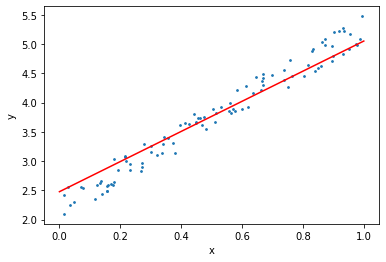

In [45]:
%matplotlib inline

w, b = w_[-1], b_[-1]
print('w = ',w,'b = ',b)
print('final cost = ',cost_[-1])
plt.figure()
plt.scatter(x,y,s=3)
plt.xlabel('x')
plt.ylabel('y')
t=np.linspace(0,1,100)
s = w*t + b
plt.plot(t,s,'r')
plt.show()

<img src="img2.png" style="width:400pt"/>